# CSVファイルをインポートして色々見てみる

In [14]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
player = 'Roger Federer'
filename = "data/{name}.csv".format(name=player.replace(' ', '-'))
df = pd.read_csv(filename)

In [16]:
print("Number of columns: " + str(len(df.columns)))
df[df.columns[:4]].tail()

Number of columns: 70


,year,tournament,start date,type
1174,2012,"Australian Open, Australia",16.01.2012,GS
1175,2012,"Doha, Qatar",02.01.2012,250
1176,2012,"Doha, Qatar",02.01.2012,250
1177,2012,"Doha, Qatar",02.01.2012,250
1178,2012,"Doha, Qatar",02.01.2012,250


In [17]:
npoints = df['player1 total points total']
points = df['player1 total points won'] / npoints
aces = df['player1 aces'] / npoints

# グラフ描画してみる

(0.0, 0.1629310344827586)

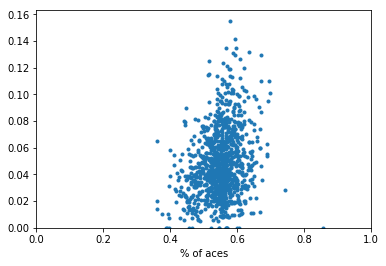

In [18]:
plt.plot(points, aces, '.')
plt.xlabel('% of points won')
plt.xlabel('% of aces')
plt.xlim(0., 1.)
plt.ylim(0.)

In [19]:
df_bis = pd.DataFrame({'points': points, 'aces': aces}).dropna()
df_bis.tail()

,points,aces
1173,0.585366,0.024390
1174,0.471014,0.039855
1175,0.639535,0.046512
1176,0.606061,0.020202
1177,0.531792,0.069364


In [20]:
df_bis.corr()

,points,aces
points,1.000000,0.255457
aces,0.255457,1.000000


In [21]:
df_bis['result'] = df_bis['points'] > df_bis['points'].median()
df_bis['manyaces'] = df_bis['aces'] > df_bis['aces'].median()

In [22]:
pd.crosstab(df_bis['result'], df_bis['manyaces'])

manyaces,False,True
result,,
False,300,214
True,214,299


In [23]:
st.chi2_contingency(_)

(27.809858855369555,
 1.338423379963363e-07,
 1,
 array([[257.25024343, 256.74975657],
        [256.74975657, 256.25024343]]))

In [26]:
pval = 2 * (1 - st.norm.cdf(2.119))

In [27]:
pval

0.03409046695046203